In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rc('figure',figsize=(17,13))
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots
pyo.init_notebook_mode()

In [5]:
! pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 1.0 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.1.1-cp39-cp39-macosx_11_0_arm64.whl size=153083 sha256=e86d7adacef2217487d3818aabc901c99df9c96ca83ab4d21b9ef7e0a6340e6b
  Stored in directory: /Users/student/Library/Caches/pip/wheels/97/4a/4e/ebf8252ba08b46a4d8e4eb21c5594f14dacd808ec1fc4b6eb5
Successfully built wordcloud


In [6]:
import re
import string 

import nltk
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import pos_tag
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
from tqdm.auto import tqdm

In [162]:
df=pd.read_csv(r'tweets.csv')
df.head()

user_name                                               text  \
0           Bohmle  #GPT4 for FREE. \nNo its not a clickbait, @Qol...   
1              NaN                                      AI enthusiast   
2     Dan Bruno AI  ChatGPT Thinks These 5 Crypto Coins Will Explo...   
3  Georgiana Comsa  New: @JWVance's post about 5 #startups (includ...   
4     Bitone Great  🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...   

               user_location  \
0                  Carkingga   
1  2019-07-03 03:44:41+00:00   
2             Manchester, NH   
3                  Palo Alto   
4                  Hong Kong   

                                    user_description  \
0                                                NaN   
1                                               60.0   
2  The latest in #ChatGPT, #BARD, #Bing, and othe...   
3  Founder of Silicon Valley PR, award-winning PR...   
4  #ChatGPT (AI) powered Free Trading Signal! \nL...   

                user_created user_followers user_friends  \
0                        NaN            NaN          NaN   
1                      349.0            611        False   
2  2021-05-19 01:19:32+00:00          470.0        157.0   
3  2008-12-24 09:32:23+00:00         3864.0       1883.0   
4  2022-11-21 04:42:18+00:00         1517.0        506.0   

             user_favourites         user_verified                       date  \
0                        NaN                   NaN                        NaN   
1  2023-05-17 18:11:12+00:00  ['GPT4', 'ChatGPT4']            Twitter Web App   
2                       5185                 False  2023-05-17 18:11:03+00:00   
3                       2415                 False  2023-05-17 18:10:25+00:00   
4                         64                 False  2023-05-17 18:09:39+00:00   

                           hashtags           source  
0                               NaN              NaN  
1                               NaN              NaN  
2       ['chatgpt', 'AI', 'openAI']          dlvr.it  
3         ['startups', 'startup50']  Twitter Web App  
4  ['Binance', 'Short', 'GHSTUSDT']             rsi1

In [163]:
print('Rows              :',df.shape[0])
print('Columns           :',df.shape[1])
print('\nFeatures        :\n',df.columns.tolist())
print('\nMissing values  :',df.isna().sum().values.sum())
print('\nUnique values   :',df.nunique())

Rows              : 3412811
Columns           : 12

Features        :
 ['user_name', 'text', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date', 'hashtags', 'source']

Missing values  : 32106521

Unique values   : user_name           183646
text                474943
user_location        41866
user_description    187179
user_created        185757
user_followers       43556
user_friends         18652
user_favourites      51271
user_verified           62
date                459640
hashtags            110543
source                1230
dtype: int64


Here new feature "sentiment" is created. corresponding to each tweet text.

In [164]:
df = df.head(500)

In [165]:
! pip install demoji

In [166]:
import demoji
# download the demoji library
demoji.download_codes()

# A little preprocessing

In [167]:
# define a function to preprocess the text
def preprocess_text(text):
    # remove emoji
    text = demoji.replace(text, "")
    # remove URLs
    text = " ".join(word for word in text.split() if not "http" in word)
    # remove usernames
    text = " ".join(word for word in text.split() if not word.startswith("@"))
    # remove punctuation
    text = "".join(word for word in text if not word in string.punctuation)
    # convert to lowercase
    text = text.lower()
    return text

In [168]:
#df['text'] = df['text'].apply(preprocess_text)

In [169]:
! pip install vaderSentiment

# Sentiment Analysis

In [170]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
analyser=SentimentIntensityAnalyzer()
scores=[]
df['text'] = df['text'].astype(str) # convert to string type
for i in range(len(df['text'])):
    
    score=analyser.polarity_scores(df['text'][i])
    score=score['compound']
    scores.append(score)
sentiment=[]
for i in scores:
    if i>=0.05:
        sentiment.append('Positive')
    elif i<=(-0.05):
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df['sentiment']=pd.Series(np.array(sentiment))

#### the sentiments here, are mentioned at the end of each row (last column)

In [171]:
df.head()

user_name                                               text  \
0           Bohmle  #GPT4 for FREE. \nNo its not a clickbait, @Qol...   
1              NaN                                      AI enthusiast   
2     Dan Bruno AI  ChatGPT Thinks These 5 Crypto Coins Will Explo...   
3  Georgiana Comsa  New: @JWVance's post about 5 #startups (includ...   
4     Bitone Great  🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation:...   

               user_location  \
0                  Carkingga   
1  2019-07-03 03:44:41+00:00   
2             Manchester, NH   
3                  Palo Alto   
4                  Hong Kong   

                                    user_description  \
0                                                NaN   
1                                               60.0   
2  The latest in #ChatGPT, #BARD, #Bing, and othe...   
3  Founder of Silicon Valley PR, award-winning PR...   
4  #ChatGPT (AI) powered Free Trading Signal! \nL...   

                user_created user_followers user_friends  \
0                        NaN            NaN          NaN   
1                      349.0            611        False   
2  2021-05-19 01:19:32+00:00          470.0        157.0   
3  2008-12-24 09:32:23+00:00         3864.0       1883.0   
4  2022-11-21 04:42:18+00:00         1517.0        506.0   

             user_favourites         user_verified                       date  \
0                        NaN                   NaN                        NaN   
1  2023-05-17 18:11:12+00:00  ['GPT4', 'ChatGPT4']            Twitter Web App   
2                       5185                 False  2023-05-17 18:11:03+00:00   
3                       2415                 False  2023-05-17 18:10:25+00:00   
4                         64                 False  2023-05-17 18:09:39+00:00   

                           hashtags           source sentiment  
0                               NaN              NaN  Positive  
1                               NaN              NaN  Positive  
2       ['chatgpt', 'AI', 'openAI']          dlvr.it   Neutral  
3         ['startups', 'startup50']  Twitter Web App  Positive  
4  ['Binance', 'Short', 'GHSTUSDT']             rsi1   Neutral

## Exploratory Data Analysis (EDA)

In [172]:
df = df.head(500)

In [173]:
# Sentiment count
temp=df.groupby('sentiment')['text'].count().reset_index().sort_values(by='sentiment',ascending=False)
temp.style.background_gradient(cmap='Blues')

<Axes: xlabel='sentiment'>

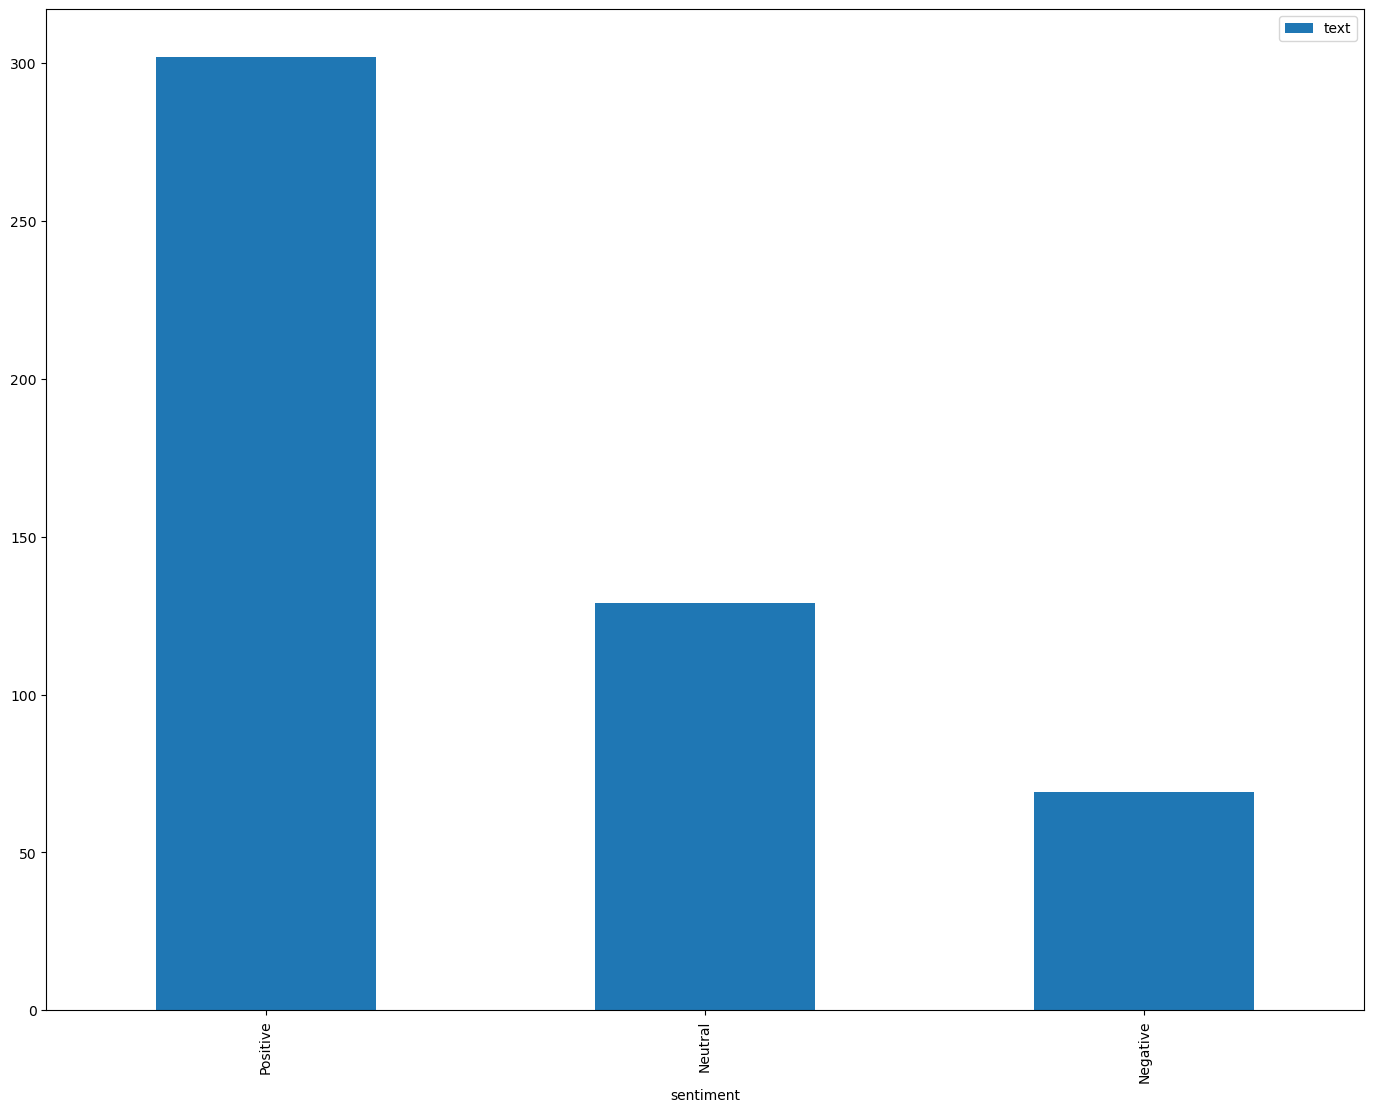

In [174]:
temp.plot(x="sentiment", y="text", kind="bar")

## The Top 30 Most Hashtags in the tweet text data

In [175]:
# importing required modules 
import matplotlib.pyplot as plt

In [176]:
df['hashtags']=df['hashtags'].fillna('[]')

all_hashtags=[]
for i in range(len(df['hashtags'])):
    a=df['hashtags'][i].strip('][').split(',')
    for i in a:
        all_hashtags.append(i)
all_hashtags=['No hashtags' if x=='' else x for x in all_hashtags]

all_hashtags=pd.Series(np.array(all_hashtags))
print('There are {} instances of tweets in which No hashtags were used'.format(all_hashtags.value_counts()[1]))

common_hashtags=all_hashtags.value_counts().drop(labels='No hashtags')[:30].rename_axis('Common Hashtags').reset_index(name='count')
fig=px.treemap(common_hashtags,path=['Common Hashtags'],values='count',title='Top 30 Common Hashtags')
#fig.show() 


There are 132 instances of tweets in which No hashtags were used


<Axes: xlabel='Common Hashtags'>

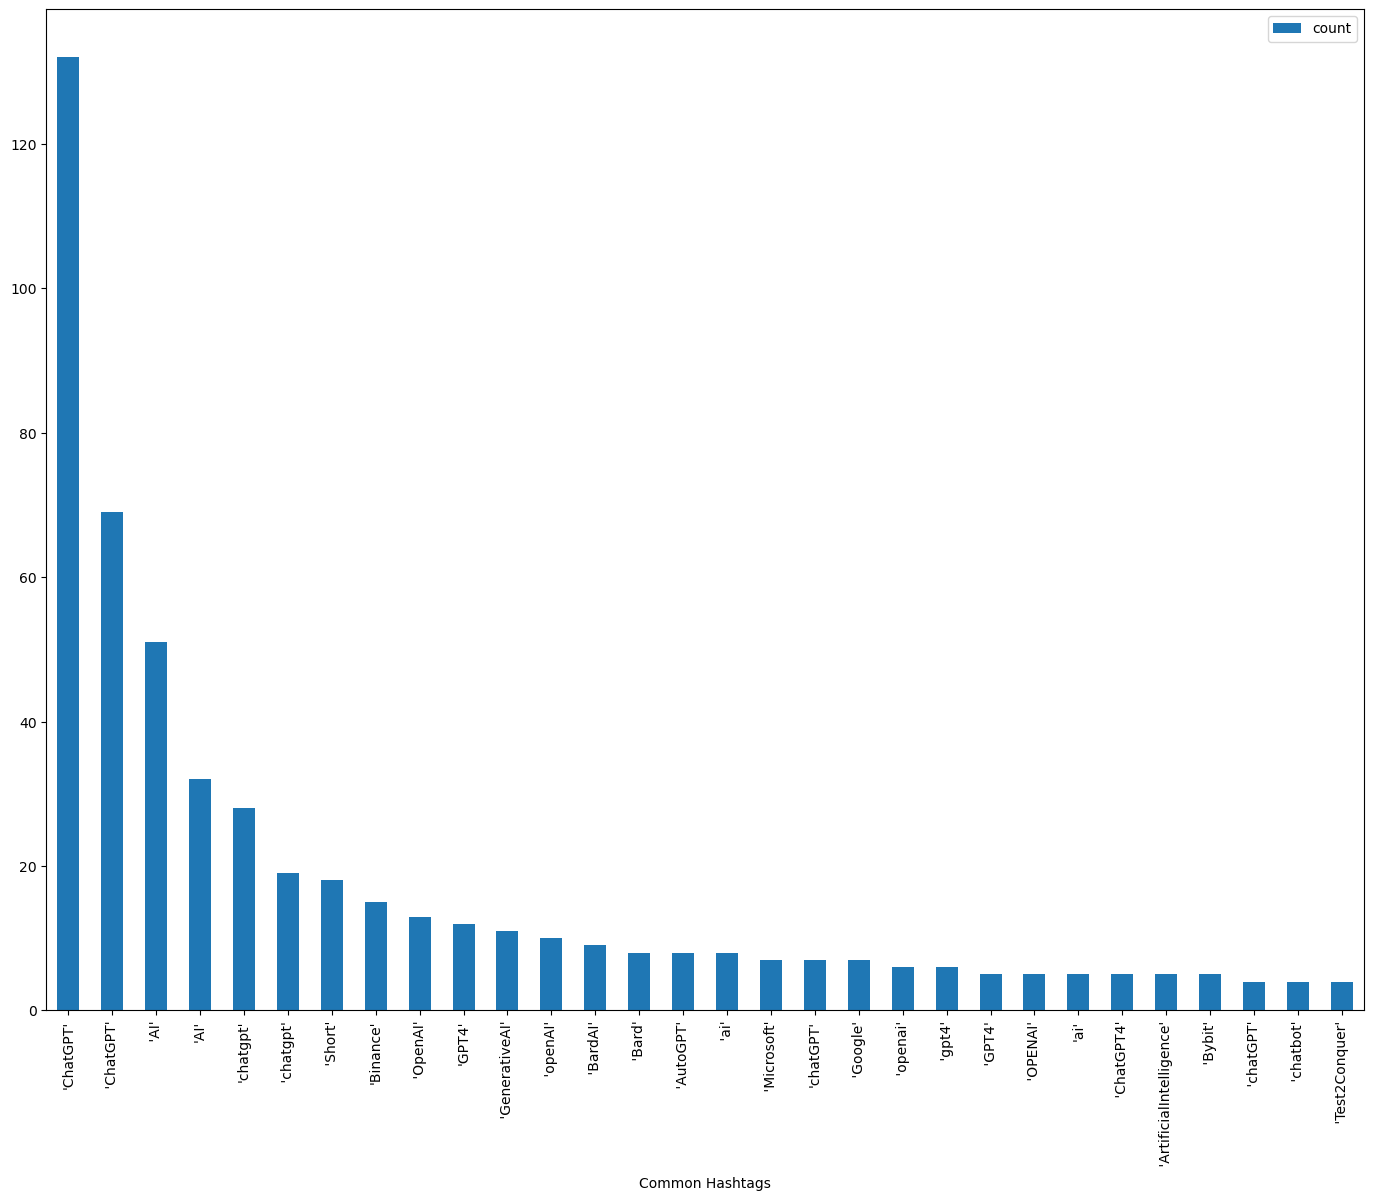

In [177]:
common_hashtags.plot(x="Common Hashtags", y="count", kind="bar")

Sentiment wise analysis of hashtags and words

In [178]:
positive_tweet=df[df['sentiment']=='Positive'].reset_index()
negative_tweet=df[df['sentiment']=='Negative'].reset_index()
neutral_tweet=df[df['sentiment']=='Neutral'].reset_index()

In [179]:
# POSITIVE TWEETS
all_positive_words=[]
all_positive_hashtags=[]
for i in range(len(positive_tweet['text'])):
    a=positive_tweet['text'][i]
    b=positive_tweet['hashtags'][i].strip('][').split(', ')
    for i in a:
        all_positive_words.append(i)
    for i in b:
        all_positive_hashtags.append(i)

all_positive_words=pd.Series(np.array(all_positive_words))
all_positive_hashtags=pd.Series(np.array(all_positive_hashtags))

In [180]:
all_negative_words=[]
all_negative_hashtags=[]
for i in range(len(negative_tweet['text'])):
    a=negative_tweet['text'][i]
    b=negative_tweet['hashtags'][i].strip('][').split(', ')
    for i in a:
        all_negative_words.append(i)
    for i in b:
        all_negative_hashtags.append(i)
all_negative_words=pd.Series(np.array(all_negative_words))
all_negative_hashtags=pd.Series(np.array(all_negative_hashtags))

In [181]:
all_neutral_words=[]
all_neutral_hashtags=[]
for i in range(len(neutral_tweet['text'])):
    a=neutral_tweet['text'][i]
    b=neutral_tweet['hashtags'][i].strip('][').split(', ')
    for i in a:
        all_neutral_words.append(i)
    for i in b:
        all_neutral_hashtags.append(i)
all_neutral_words=pd.Series(np.array(all_neutral_words))
all_neutral_hashtags=pd.Series(np.array(all_neutral_hashtags))

In [182]:
common=set(all_positive_words).intersection(set(all_negative_words)).intersection(set(all_neutral_words))
common_list=list(common)

In [183]:
common_words=all_negative_words.value_counts().drop(labels=common_list)[:30].rename_axis('common negative words').reset_index(name='count')

<Axes: xlabel='common negative words'>

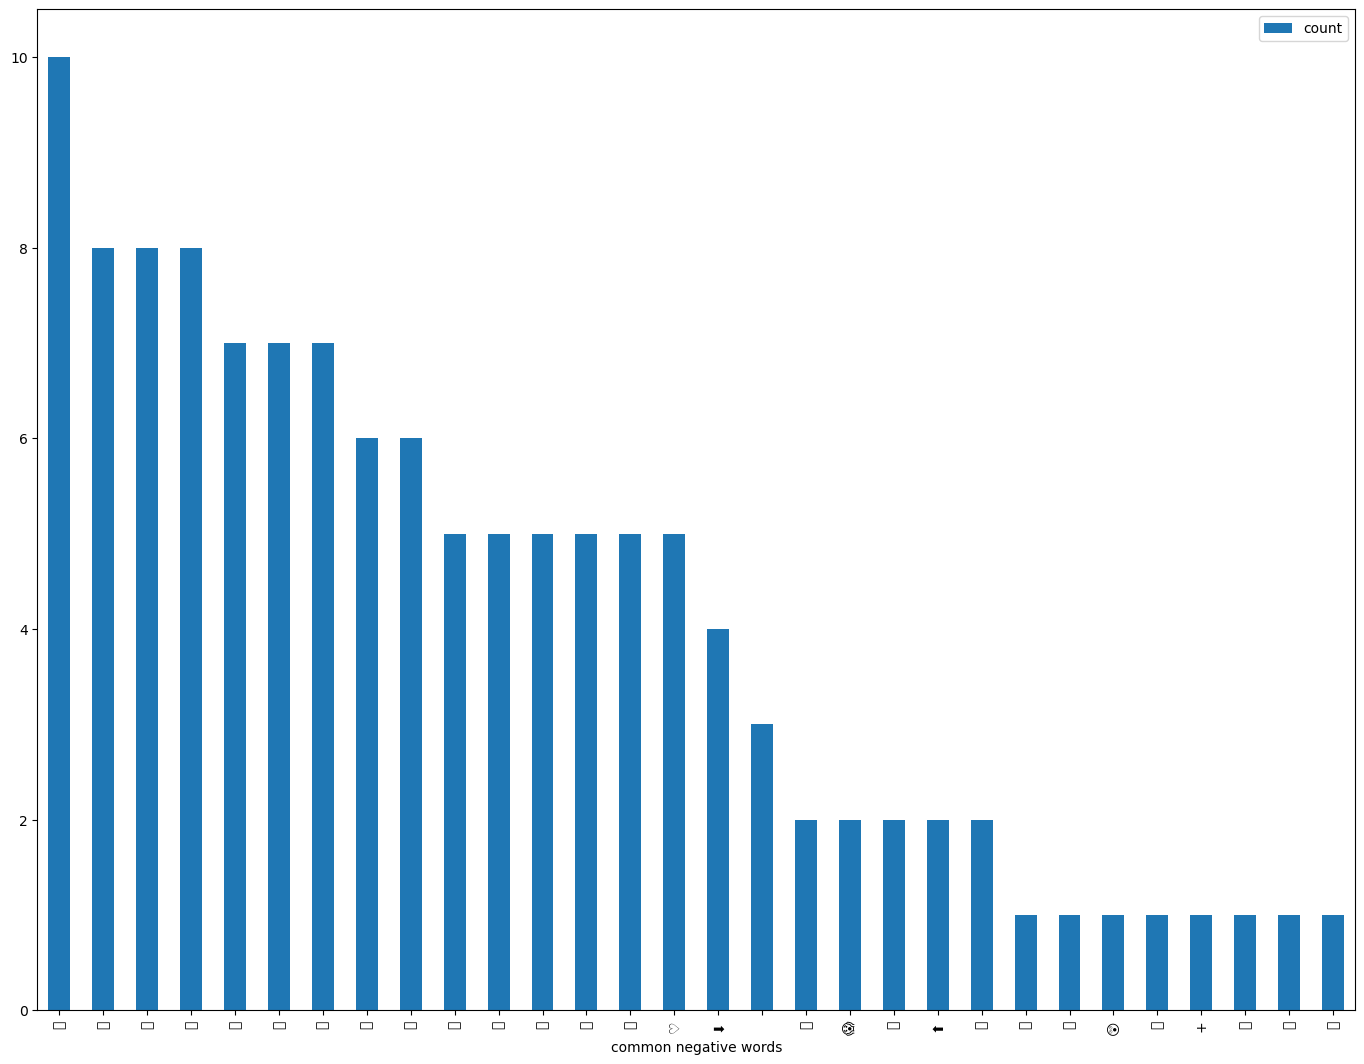

In [184]:
common_words.plot(x="common negative words", y="count", kind="bar")

In [185]:
common_words=all_positive_words.value_counts().drop(labels=common_list)[:30].rename_axis('common positive words').reset_index(name='count')

<Axes: xlabel='common positive words'>

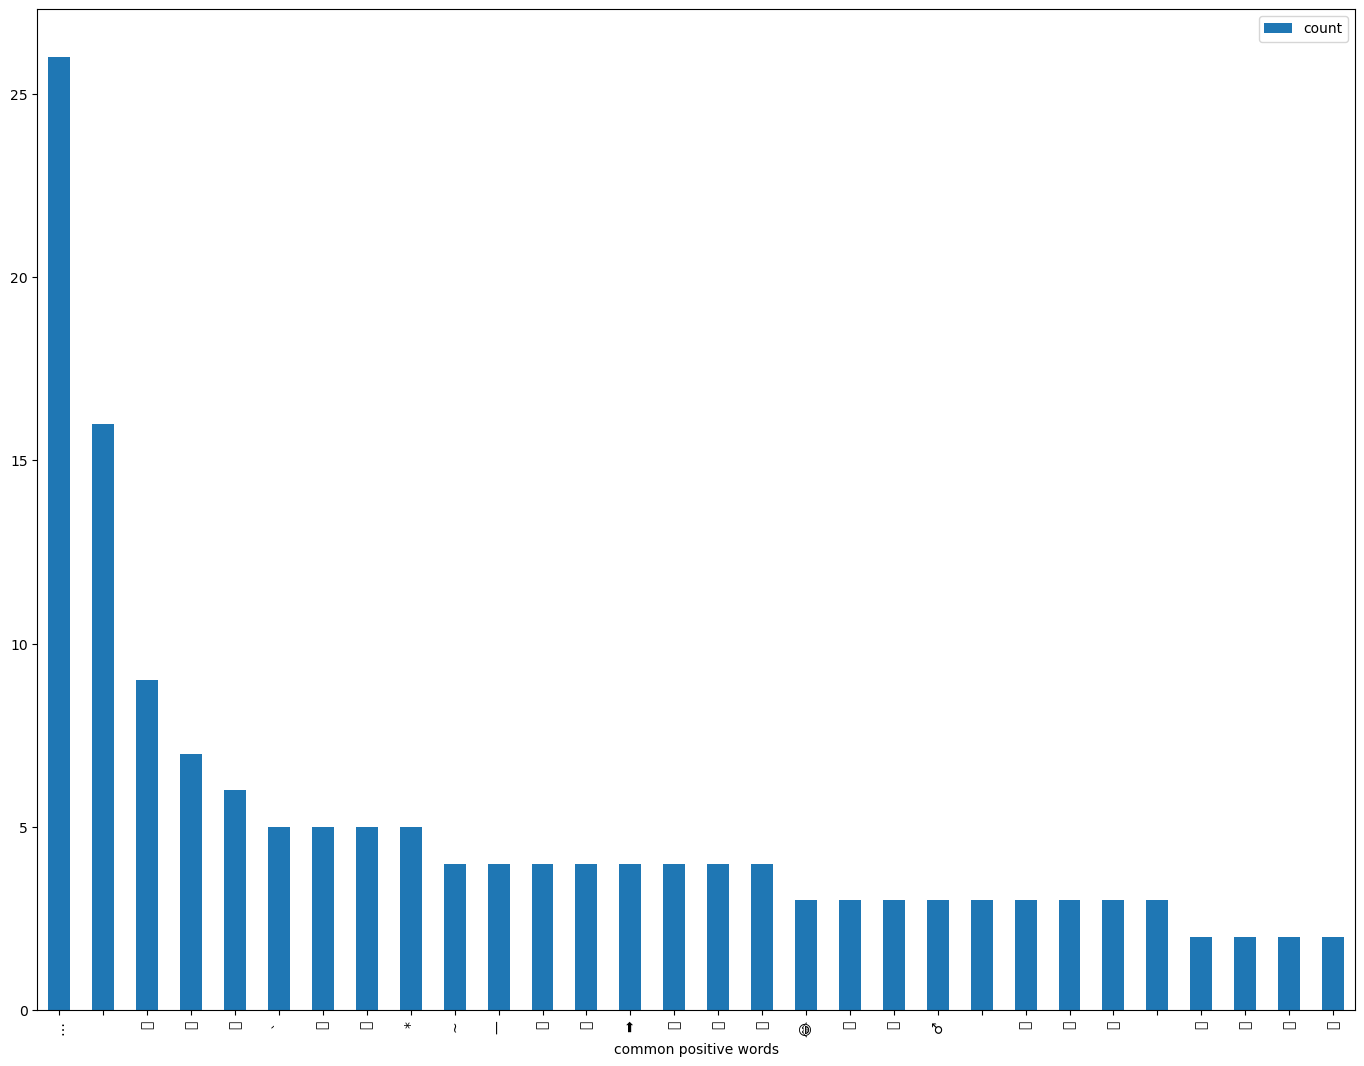

In [186]:
common_words.plot(x="common positive words", y="count", kind="bar")

In [187]:
common_words=all_neutral_words.value_counts().drop(labels=common_list)[:30].rename_axis('common neutral words').reset_index(name='count')

<Axes: xlabel='common neutral words'>

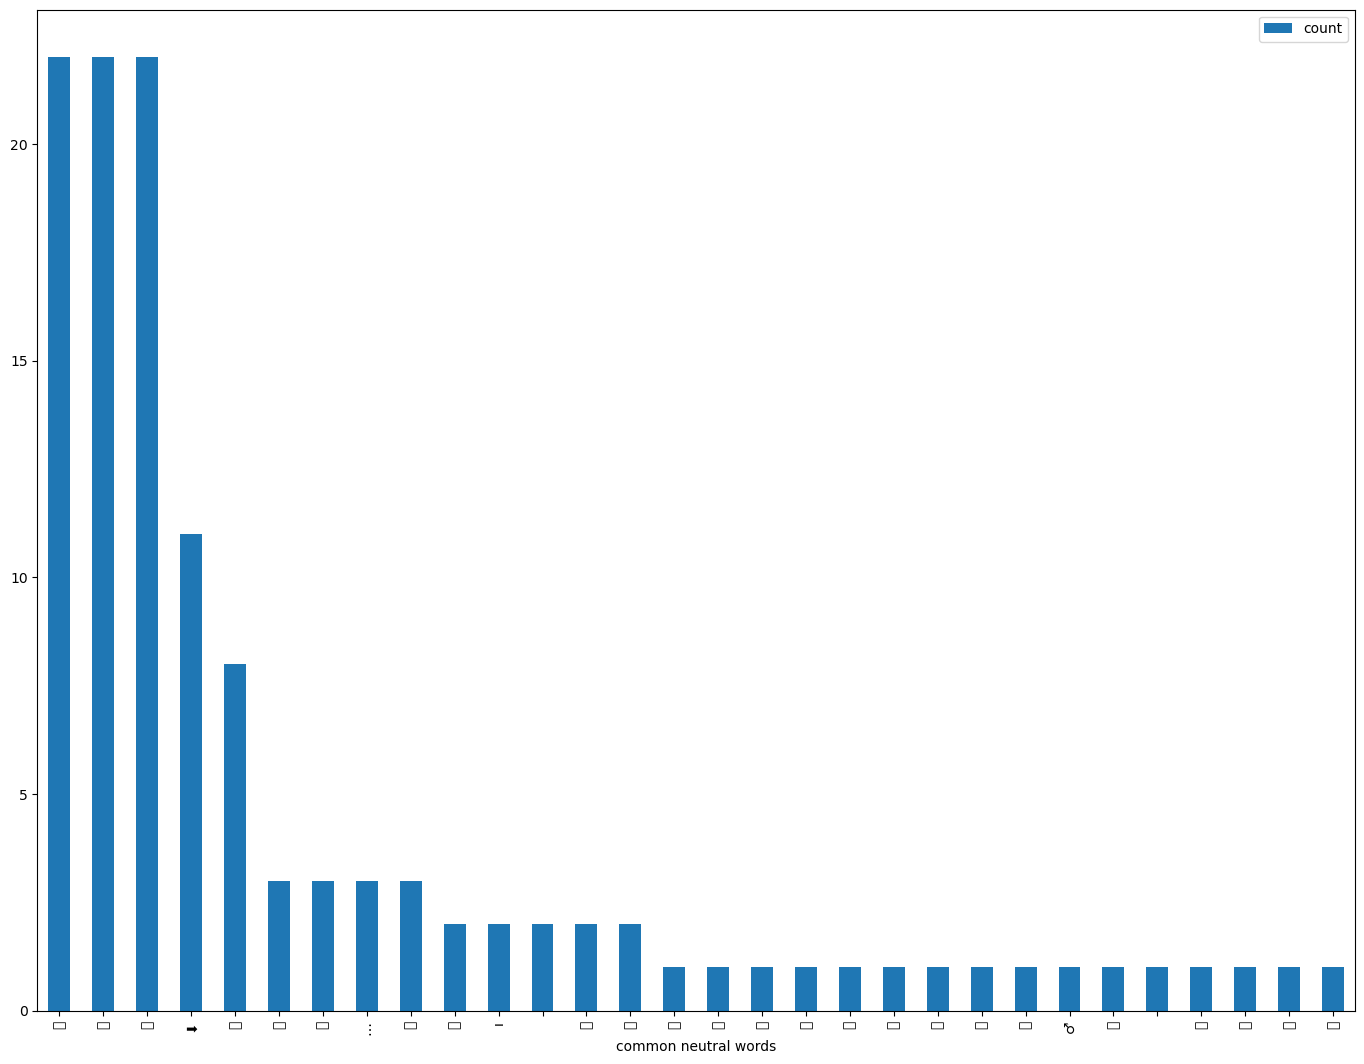

In [188]:
common_words.plot(x="common neutral words", y="count", kind="bar")

 Source Distribution of Tweets

In [189]:
data_=df['source'].value_counts().reset_index()

<Axes: xlabel='index'>

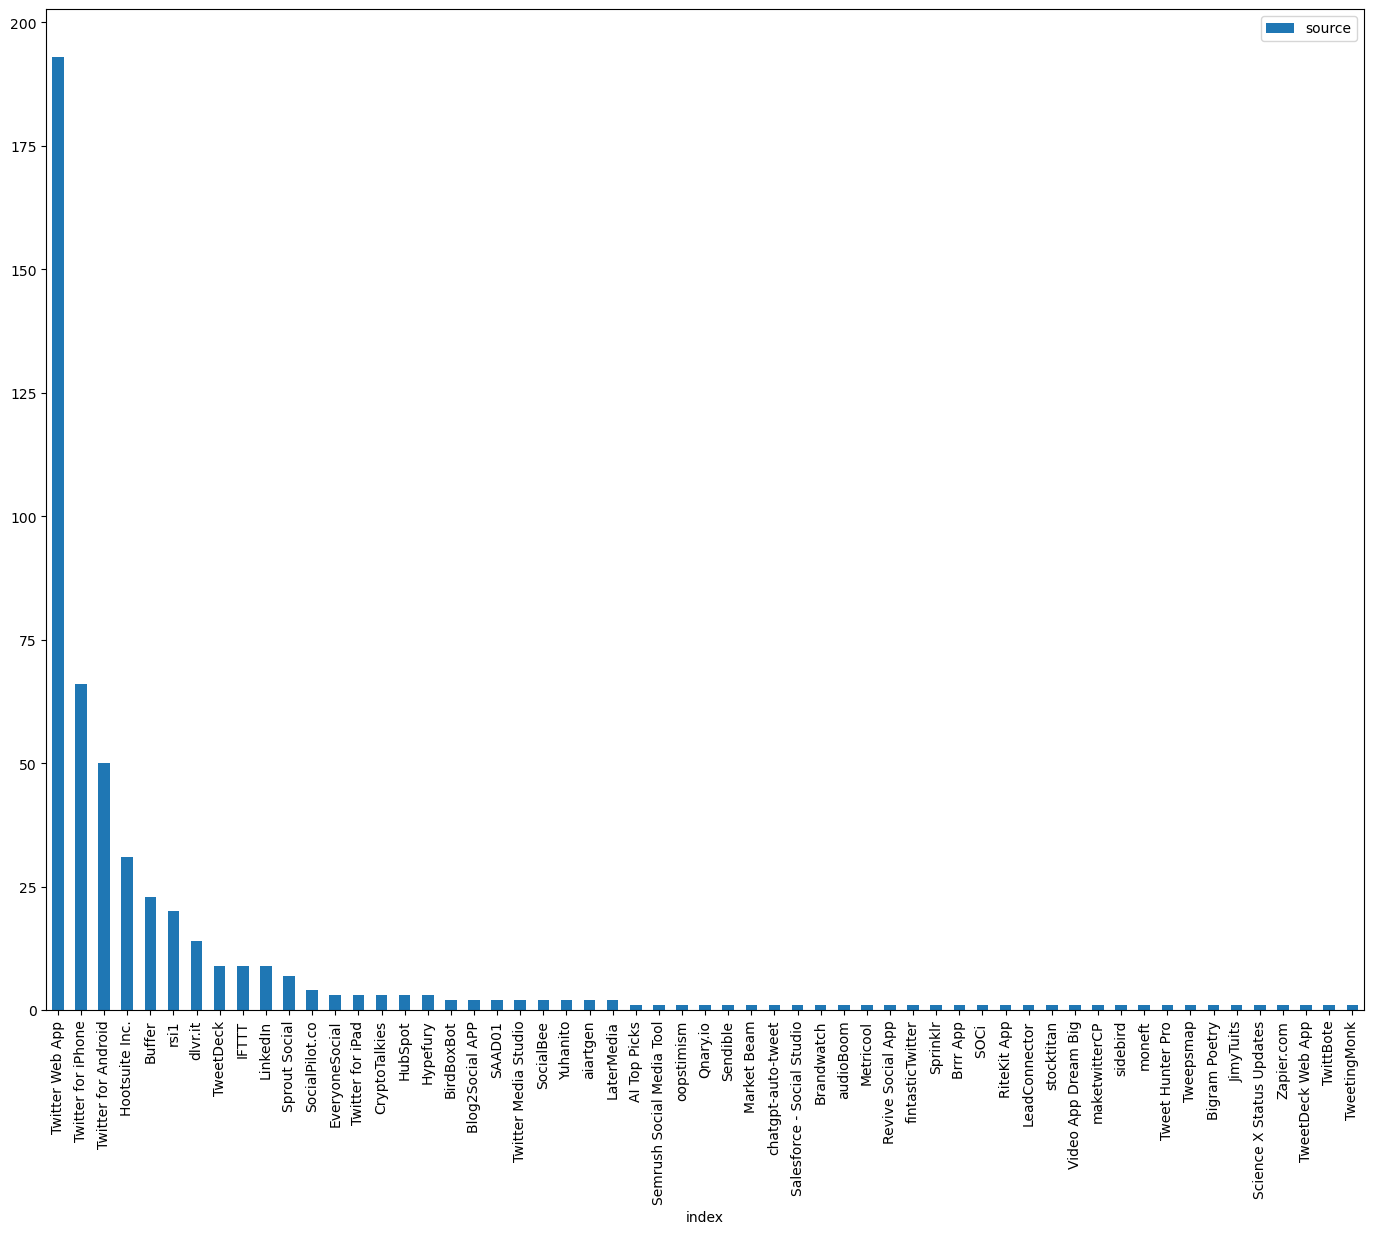

In [190]:
data_.plot(x="index", y="source", kind="bar")

Location Based Sentiment analysis:

In [191]:
df['user_location']=df['user_location'].fillna('')

postive_tweet=df[df['sentiment']=='Positive'].reset_index()
negative_tweet=df[df['sentiment']=='Negative'].reset_index()
neutral_tweet=df[df['sentiment']=='Neutral'].reset_index()

pos_location=positive_tweet['user_location']
neg_location=negative_tweet['user_location']
neu_location=neutral_tweet['user_location']

common=set(pos_location).intersection(set(neg_location)).intersection(set(neu_location))
common_list=list(common)

common_words_neg=neg_location.value_counts().drop(labels=common_list)[:10].rename_axis('common negative location').reset_index(name='count')

common_words_pos=pos_location.value_counts().drop(labels=common_list)[:10].rename_axis('common positive location').reset_index(name='count')

common_words_neu=neu_location.value_counts().drop(labels=common_list)[:10].rename_axis('common neutral location').reset_index(name='count')

<Axes: xlabel='common negative location'>

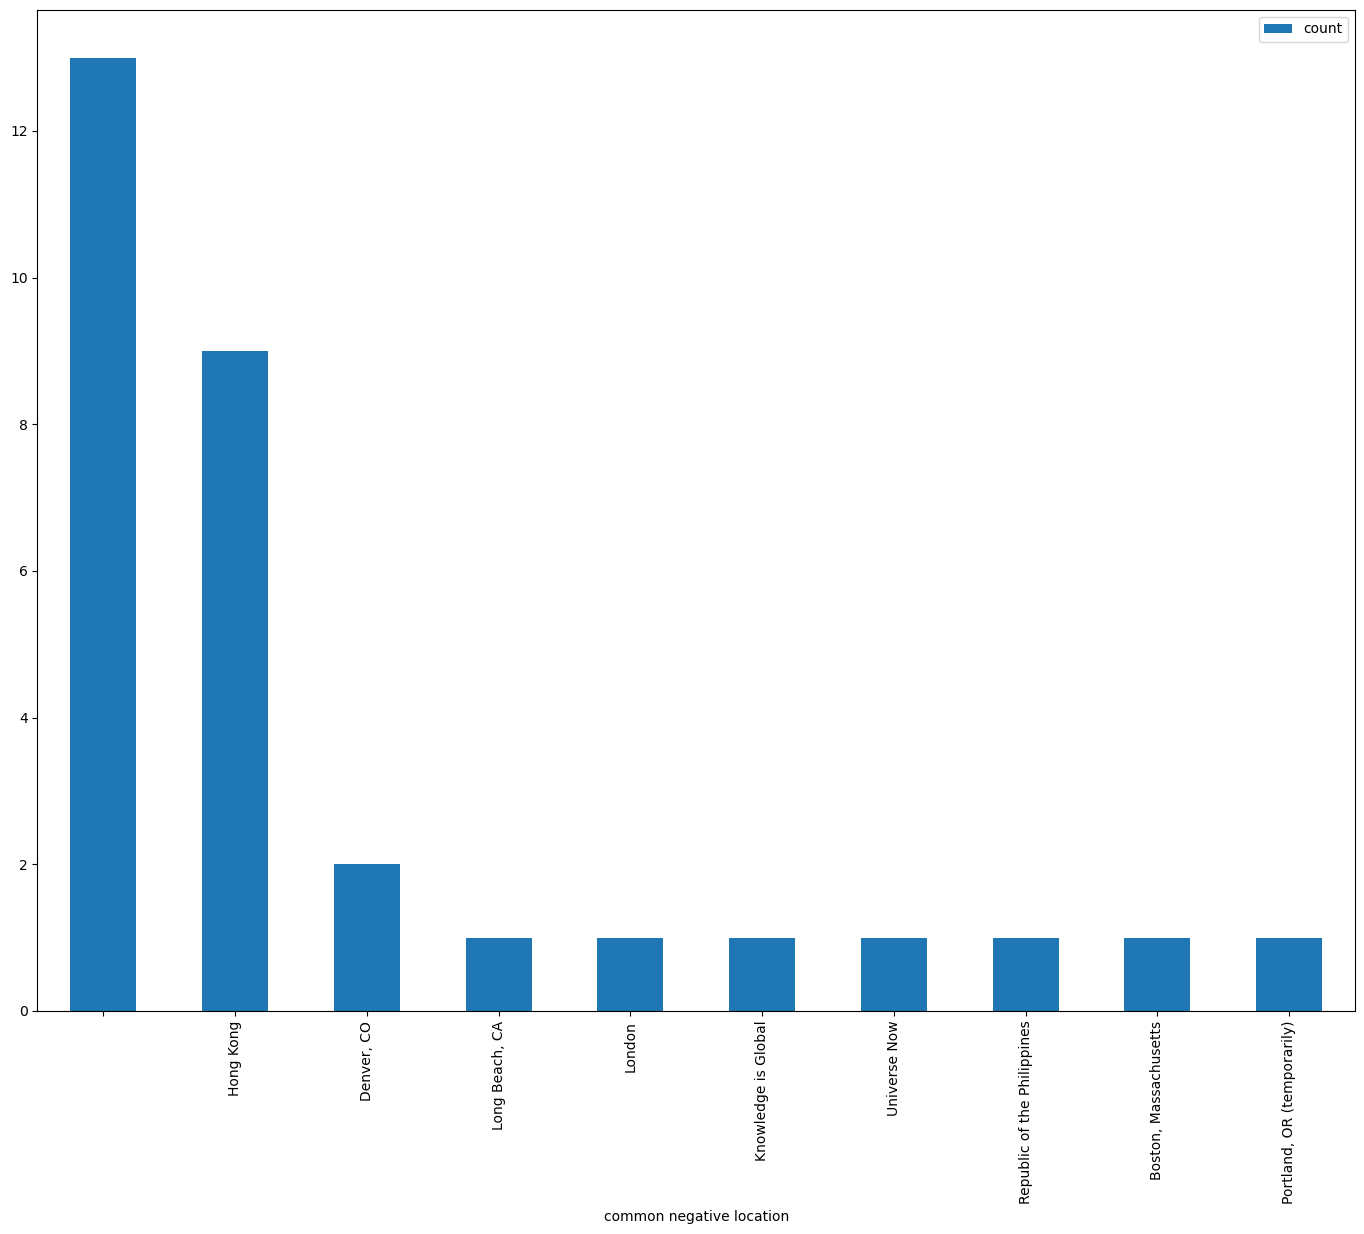

In [192]:
common_words_neg.plot(x="common negative location", y="count", kind="bar")

<Axes: xlabel='common positive location'>

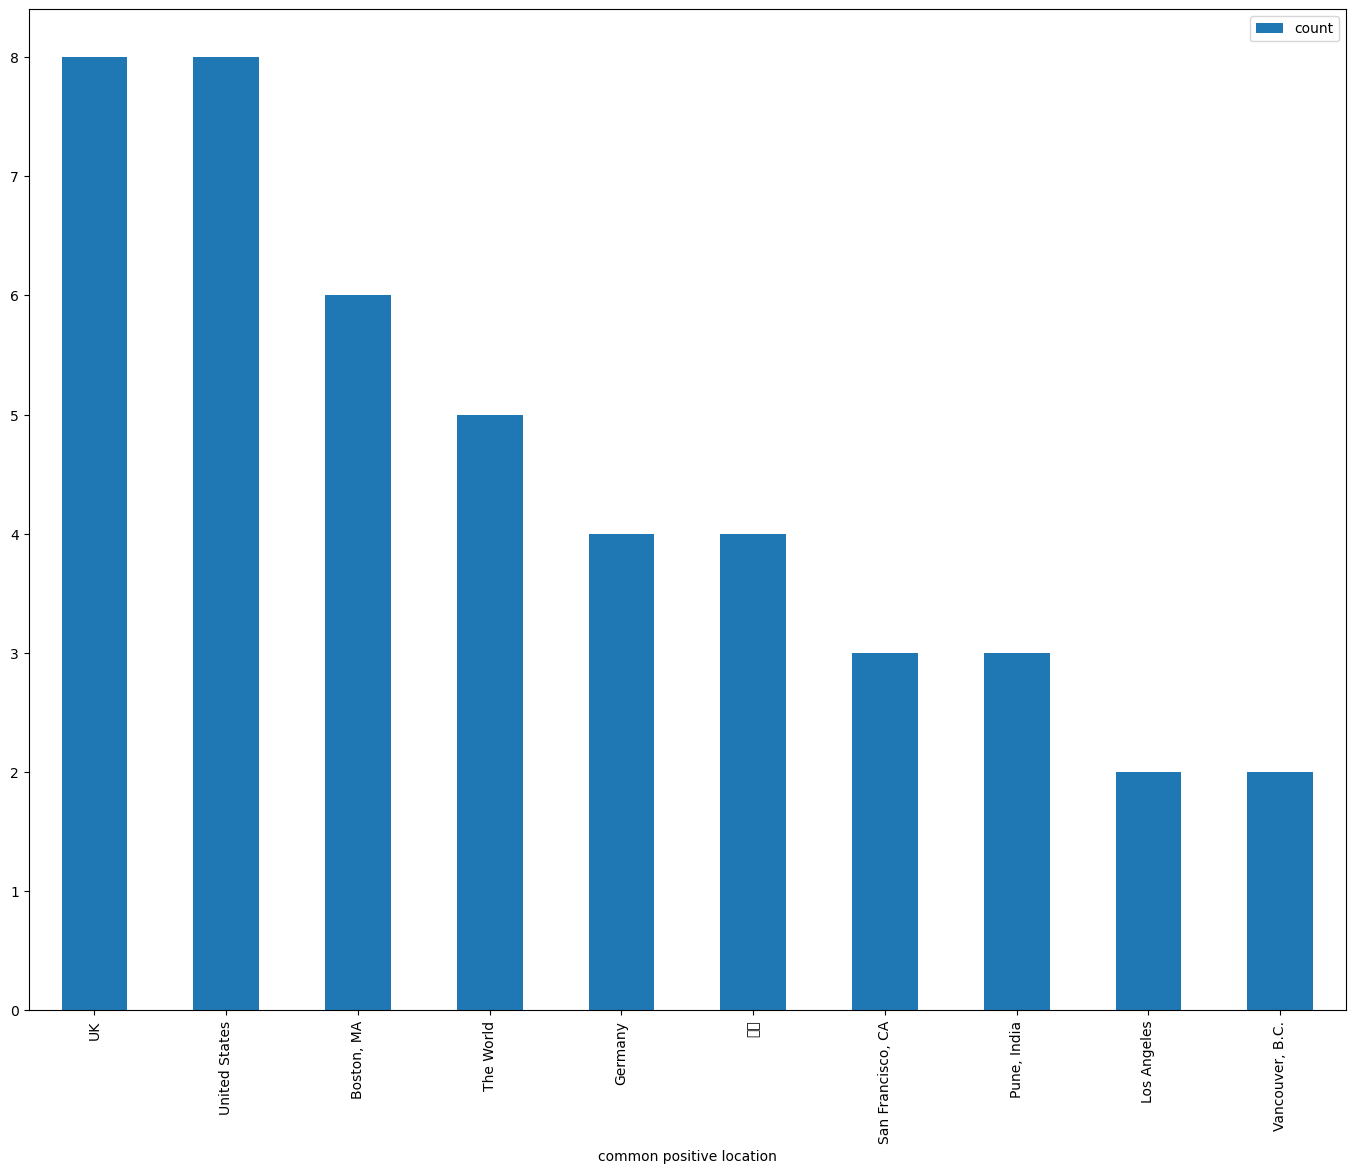

In [193]:
common_words_pos.plot(x="common positive location", y="count", kind="bar")

<Axes: xlabel='common neutral location'>

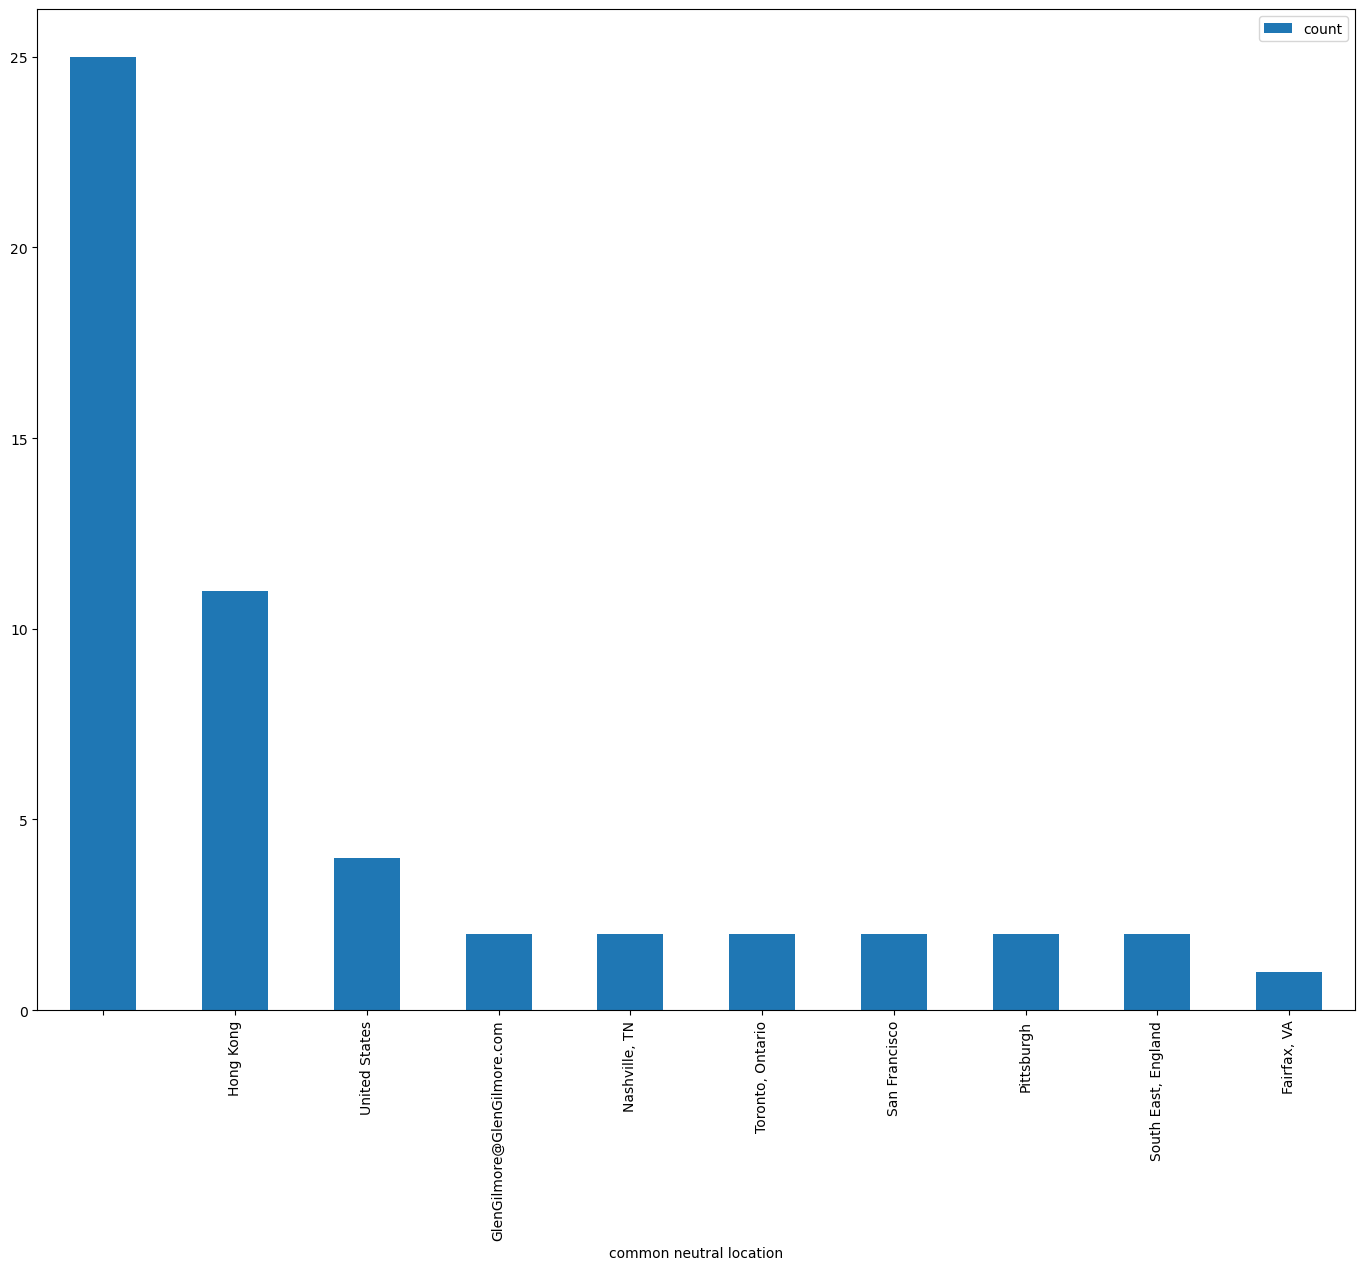

In [194]:
common_words_neu.plot(x="common neutral location", y="count", kind="bar")

# Cleaning

In [203]:
def remove_line_breaks(text):
    text = text.replace('\r', ' ').replace('\n', ' ')
    return text

#remove punctuation
def remove_punctuation(text):
    re_replacements = re.compile("__[A-Z]+__")  # such as __NAME__, __LINK__
    re_punctuation = re.compile("[%s]" % re.escape(string.punctuation))
    '''Escape all the characters in pattern except ASCII letters and numbers'''
    tokens = word_tokenize(text)
    tokens_zero_punctuation = []
    for token in tokens:
        if not re_replacements.match(token):
            token = re_punctuation.sub(" ", token)
        tokens_zero_punctuation.append(token)
    return ' '.join(tokens_zero_punctuation)


def remove_special_characters(text):
    text = re.sub('[^a-zA-z0-9\s]', '', text)
    return text

def lowercase(text):
    text_low = [token.lower() for token in word_tokenize(text)]
    return ' '.join(text_low)

def remove_stopwords(text):
    stop = set(stopwords.words('english'))
    word_tokens = nltk.word_tokenize(text)
    text = " ".join([word for word in word_tokens if word not in stop])
    return text

def remove_one_character_words(text):
    '''Remove words from dataset that contain only 1 character'''
    text_high_use = [token for token in word_tokenize(text) if len(token)>1]      
    return ' '.join(text_high_use)   
    
#%%
# Stemming with 'Snowball stemmer" package
def stem(text):
    stemmer = nltk.stem.snowball.SnowballStemmer('english')
    text_stemmed = [stemmer.stem(token) for token in word_tokenize(text)]        
    return ' '.join(text_stemmed)

def lemma(text):
    wordnet_lemmatizer = WordNetLemmatizer()
    word_tokens = nltk.word_tokenize(text)
    text_lemma = " ".join([wordnet_lemmatizer.lemmatize(word) for word in word_tokens])       
    return ' '.join(text_lemma)

def sentence_word(text):
    word_tokens = nltk.word_tokenize(text)
    return word_tokens
#break paragraphs to sentence token 
def paragraph_sentence(text):
    sent_token = nltk.sent_tokenize(text)
    return sent_token    

def tokenize(text):
    """Return a list of words in a text."""
    return re.findall(r'\w+', text)

def remove_numbers(text):
    no_nums = re.sub(r'\d+', '', text)
    return ''.join(no_nums)

def clean_text(text):
    _steps = [
    remove_line_breaks,
    remove_one_character_words,
    remove_special_characters,
    lowercase,
    remove_punctuation,
    remove_stopwords,
    stem,
    remove_numbers
]
    for step in _steps:
        text=step(text)
    return text 

In [204]:
df['text']=df['text'].astype(str)
df['text']=[x.replace(':',' ') for x in df['text']]

In [205]:
df['clean_text']=pd.Series([clean_text(i) for i in tqdm(df['text'])])


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 1515.81it/s]


In [206]:
df.loc[:,['text','clean_text']]

text  \
0    #GPT4 for FREE. \nNo its not a clickbait, @Qol...   
1                                        AI enthusiast   
2    ChatGPT Thinks These 5 Crypto Coins Will Explo...   
3    New  @JWVance's post about 5 #startups (includ...   
4    🚨Get Out!🚨\n💰#Binance Spot💰\n⬇ Recommendation ...   
..                                                 ...   
495  #ChatGPT set off an endless stream of fear and...   
496  ChatGPT is a hot topic; there is no doubt. It ...   
497  Exciting news! #chatGPT has launched its Plugi...   
498  @Oncrawl Agreed! The #ChatGPT is definitely th...   
499  Do you agree whatever is put on the internet d...   

                                            clean_text  
0    gpt free clickbait qolaba studio chatbot power...  
1                                        ai enthusiast  
2    chatgpt think crypto coin explod year yahoo fi...  
3    new jwvanc post startup includ vcinityinc st s...  
4    get binanc spot recommend short ticker ghstusd...  
..                                                 ...  
495  chatgpt set endless stream fear despair closer...  
496  chatgpt hot topic doubt chang write publish so...  
497  excit news chatgpt launch plugin store mark co...  
498  oncrawl agre chatgpt definit superior chatbot ...  
499  agre whatev put internet nt go away watch full...  

[500 rows x 2 columns]

Most discussed terms

In [139]:
words=df['clean_text'].values

In [140]:
ls=[]
for i in words:
    ls.append(str(i))

(-0.5, 1599.5, 799.5, -0.5)

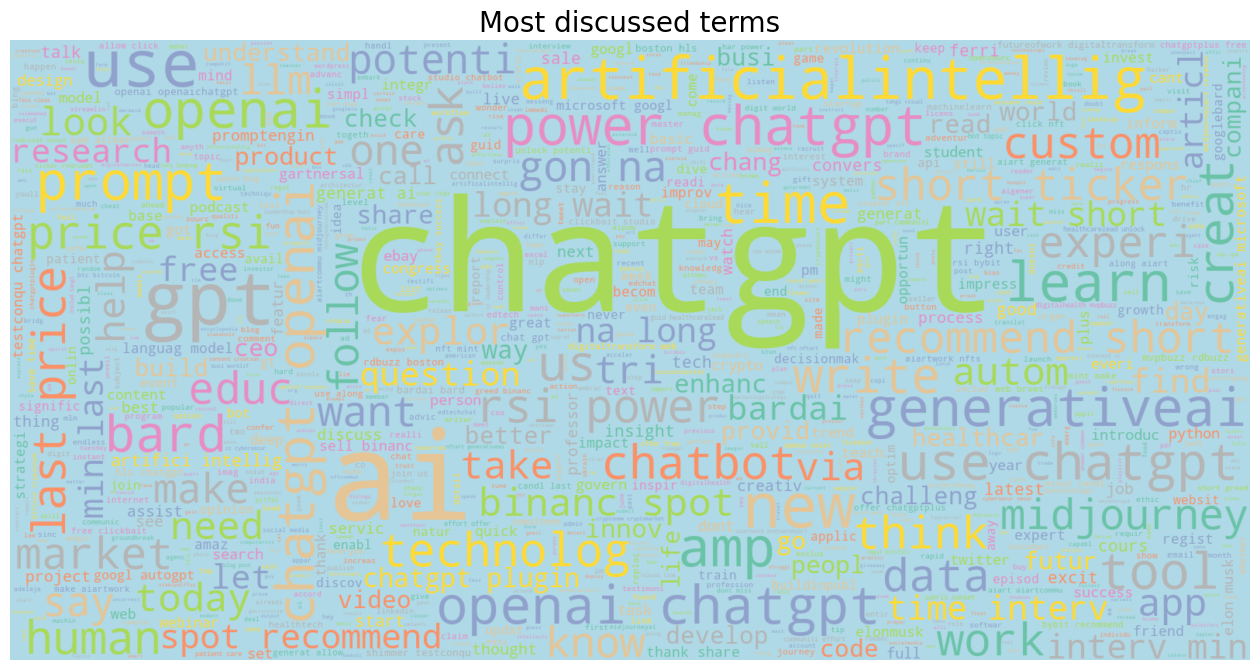

In [141]:
plt.figure(figsize=(16,13))
wc=WordCloud(background_color='lightblue',colormap='Set2',max_words=1000,max_font_size=200,width=1600,height=800)
wc.generate(" ".join(ls))
plt.title('Most discussed terms',fontsize=20)
plt.imshow(wc.recolor(colormap='Set2',random_state=17),alpha=0.98,interpolation='bilinear')
plt.axis('off')

# N-Gram Analysis

In [148]:
! pip install keras

In [151]:
! pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 MB 3.7 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 4.3 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 4.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 4.3 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 22.11.23
    Uninstalling flatbuffers-22.11.23:
      Successfully uninstalled flatbuffers-22.11.23
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tensorboard-data-server-0.6.1


  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.10.1
    Uninstalling tensorboard-2.10.1:
      Successfully uninstalled tensorboard-2.10.1
  Attempting uninstall: tensorflow-macos
    Found existing installation: tensorflow-macos 2.10.0
    Uninstalling tensorflow-macos-2.10.0:
      Successfully uninstalled tensorflow-macos-2.10.0


In [153]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re
from wordcloud import WordCloud
from collections import Counter
import csv
from matplotlib import rcParams
from nltk.corpus import stopwords
import nltk
from nltk.util import ngrams
stop = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


In [207]:
df['clean_text'].head(10)

0    gpt free clickbait qolaba studio chatbot power...
1                                        ai enthusiast
2    chatgpt think crypto coin explod year yahoo fi...
3    new jwvanc post startup includ vcinityinc st s...
4    get binanc spot recommend short ticker ghstusd...
5    caught web digit age could use superhero hero ...
6    video show compani logo base websit domain sho...
7    use cerberusgpt hologeneticslab simul hologene...
8    time sell binanc spot recommend short ticker a...
9    andr look chatgpt creat ad promot ai featur am...
Name: clean_text, dtype: object

In [220]:
def tokenizeandstopwords(text):
    tokens = nltk.word_tokenize(text)
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

In [221]:
df['clean_text'] = df['clean_text'].apply(tokenizeandstopwords)

In [223]:
df['clean_text'].head(5)

0    [gpt, free, clickbait, qolaba, studio, chatbot...
1                                     [ai, enthusiast]
2    [chatgpt, think, crypto, coin, explod, year, y...
3    [new, jwvanc, post, startup, includ, vcinityin...
4    [get, binanc, spot, recommend, short, ticker, ...
Name: clean_text, dtype: object

In [265]:
print(df['clean_text'])

0      [gpt, free, clickbait, qolaba, studio, chatbot...
1                                       [ai, enthusiast]
2      [chatgpt, think, crypto, coin, explod, year, y...
3      [new, jwvanc, post, startup, includ, vcinityin...
4      [get, binanc, spot, recommend, short, ticker, ...
                             ...                        
495    [chatgpt, set, endless, stream, fear, despair,...
496    [chatgpt, hot, topic, doubt, chang, write, pub...
497    [excit, news, chatgpt, launch, plugin, store, ...
498    [oncrawl, agre, chatgpt, definit, superior, ch...
499    [agre, whatev, put, internet, nt, go, away, wa...
Name: clean_text, Length: 500, dtype: object


## N-gram Analysis - Bigram and Trigram

In [267]:
combined_list = []

for row in df['clean_text']:
    for word in row:
        combined_list.append(word)
        
print(combined_list)

['gpt', 'free', 'clickbait', 'qolaba', 'studio', 'chatbot', 'power', 'chatgpt', 'offer', 'chatgptplus', 'free', 'use', 'along', 'aiart', 'generat', 'allow', 'click', 'nft', 'mint', 'make', 'aiartwork', 'nfts', 'openai', 'openaichatgpt', 'chatgpt', 'ai', 'enthusiast', 'chatgpt', 'think', 'crypto', 'coin', 'explod', 'year', 'yahoo', 'financ', 'chatgpt', 'ai', 'openai', 'https', 'tcotfoduqndz', 'new', 'jwvanc', 'post', 'startup', 'includ', 'vcinityinc', 'st', 'startup', 'challeng', 'thx', 'chatgpt', 'base', 'answer', 'macroeconom', 'pressur', 'vc', 'fund', 'track', 'record', 'manag', 'team', 'amp', 'growth', 'potenti', 'market', 'sector', 'https', 'tcojxgamjh', 'get', 'binanc', 'spot', 'recommend', 'short', 'ticker', 'ghstusdt', 'time', 'interv', 'min', 'last', 'price', 'rsi', 'power', 'chatgpt', 'ghst', 'ghst', 'alphaquarktoken', 'gon', 'na', 'long', 'wait', 'short', 'https', 'tcoqiqgttaa', 'caught', 'web', 'digit', 'age', 'could', 'use', 'superhero', 'hero', 'chatgpt', 'seamless', 'navi

In [292]:
unigrams = combined_list

### unigrams

In [293]:
unigrams

['gpt',
 'free',
 'clickbait',
 'qolaba',
 'studio',
 'chatbot',
 'power',
 'chatgpt',
 'offer',
 'chatgptplus',
 'free',
 'use',
 'along',
 'aiart',
 'generat',
 'allow',
 'click',
 'nft',
 'mint',
 'make',
 'aiartwork',
 'nfts',
 'openai',
 'openaichatgpt',
 'chatgpt',
 'ai',
 'enthusiast',
 'chatgpt',
 'think',
 'crypto',
 'coin',
 'explod',
 'year',
 'yahoo',
 'financ',
 'chatgpt',
 'ai',
 'openai',
 'https',
 'tcotfoduqndz',
 'new',
 'jwvanc',
 'post',
 'startup',
 'includ',
 'vcinityinc',
 'st',
 'startup',
 'challeng',
 'thx',
 'chatgpt',
 'base',
 'answer',
 'macroeconom',
 'pressur',
 'vc',
 'fund',
 'track',
 'record',
 'manag',
 'team',
 'amp',
 'growth',
 'potenti',
 'market',
 'sector',
 'https',
 'tcojxgamjh',
 'get',
 'binanc',
 'spot',
 'recommend',
 'short',
 'ticker',
 'ghstusdt',
 'time',
 'interv',
 'min',
 'last',
 'price',
 'rsi',
 'power',
 'chatgpt',
 'ghst',
 'ghst',
 'alphaquarktoken',
 'gon',
 'na',
 'long',
 'wait',
 'short',
 'https',
 'tcoqiqgttaa',
 'caug

## bigrams

In [295]:
bigrams = list(nltk.bigrams(combined_list))

In [296]:
bigrams

[('gpt', 'free'),
 ('free', 'clickbait'),
 ('clickbait', 'qolaba'),
 ('qolaba', 'studio'),
 ('studio', 'chatbot'),
 ('chatbot', 'power'),
 ('power', 'chatgpt'),
 ('chatgpt', 'offer'),
 ('offer', 'chatgptplus'),
 ('chatgptplus', 'free'),
 ('free', 'use'),
 ('use', 'along'),
 ('along', 'aiart'),
 ('aiart', 'generat'),
 ('generat', 'allow'),
 ('allow', 'click'),
 ('click', 'nft'),
 ('nft', 'mint'),
 ('mint', 'make'),
 ('make', 'aiartwork'),
 ('aiartwork', 'nfts'),
 ('nfts', 'openai'),
 ('openai', 'openaichatgpt'),
 ('openaichatgpt', 'chatgpt'),
 ('chatgpt', 'ai'),
 ('ai', 'enthusiast'),
 ('enthusiast', 'chatgpt'),
 ('chatgpt', 'think'),
 ('think', 'crypto'),
 ('crypto', 'coin'),
 ('coin', 'explod'),
 ('explod', 'year'),
 ('year', 'yahoo'),
 ('yahoo', 'financ'),
 ('financ', 'chatgpt'),
 ('chatgpt', 'ai'),
 ('ai', 'openai'),
 ('openai', 'https'),
 ('https', 'tcotfoduqndz'),
 ('tcotfoduqndz', 'new'),
 ('new', 'jwvanc'),
 ('jwvanc', 'post'),
 ('post', 'startup'),
 ('startup', 'includ'),
 ('in

## trigrams

In [297]:
trigrams = list(nltk.trigrams(combined_list))

In [298]:
trigrams

[('gpt', 'free', 'clickbait'),
 ('free', 'clickbait', 'qolaba'),
 ('clickbait', 'qolaba', 'studio'),
 ('qolaba', 'studio', 'chatbot'),
 ('studio', 'chatbot', 'power'),
 ('chatbot', 'power', 'chatgpt'),
 ('power', 'chatgpt', 'offer'),
 ('chatgpt', 'offer', 'chatgptplus'),
 ('offer', 'chatgptplus', 'free'),
 ('chatgptplus', 'free', 'use'),
 ('free', 'use', 'along'),
 ('use', 'along', 'aiart'),
 ('along', 'aiart', 'generat'),
 ('aiart', 'generat', 'allow'),
 ('generat', 'allow', 'click'),
 ('allow', 'click', 'nft'),
 ('click', 'nft', 'mint'),
 ('nft', 'mint', 'make'),
 ('mint', 'make', 'aiartwork'),
 ('make', 'aiartwork', 'nfts'),
 ('aiartwork', 'nfts', 'openai'),
 ('nfts', 'openai', 'openaichatgpt'),
 ('openai', 'openaichatgpt', 'chatgpt'),
 ('openaichatgpt', 'chatgpt', 'ai'),
 ('chatgpt', 'ai', 'enthusiast'),
 ('ai', 'enthusiast', 'chatgpt'),
 ('enthusiast', 'chatgpt', 'think'),
 ('chatgpt', 'think', 'crypto'),
 ('think', 'crypto', 'coin'),
 ('crypto', 'coin', 'explod'),
 ('coin', 'expl

In [307]:
def get_top_ngrams(ngrams_list):
    freq_dist = Counter(ngrams_list)
    return freq_dist.most_common(10)

# Top N-Grams

In [319]:
topunigrams = get_top_ngrams(unigrams)

In [320]:
topunigrams

[('chatgpt', 657),
 ('https', 510),
 ('ai', 305),
 ('openai', 109),
 ('use', 76),
 ('gpt', 64),
 ('time', 54),
 ('short', 42),
 ('power', 41),
 ('generativeai', 39)]

Text(0.5, 0, '# of Occurances')

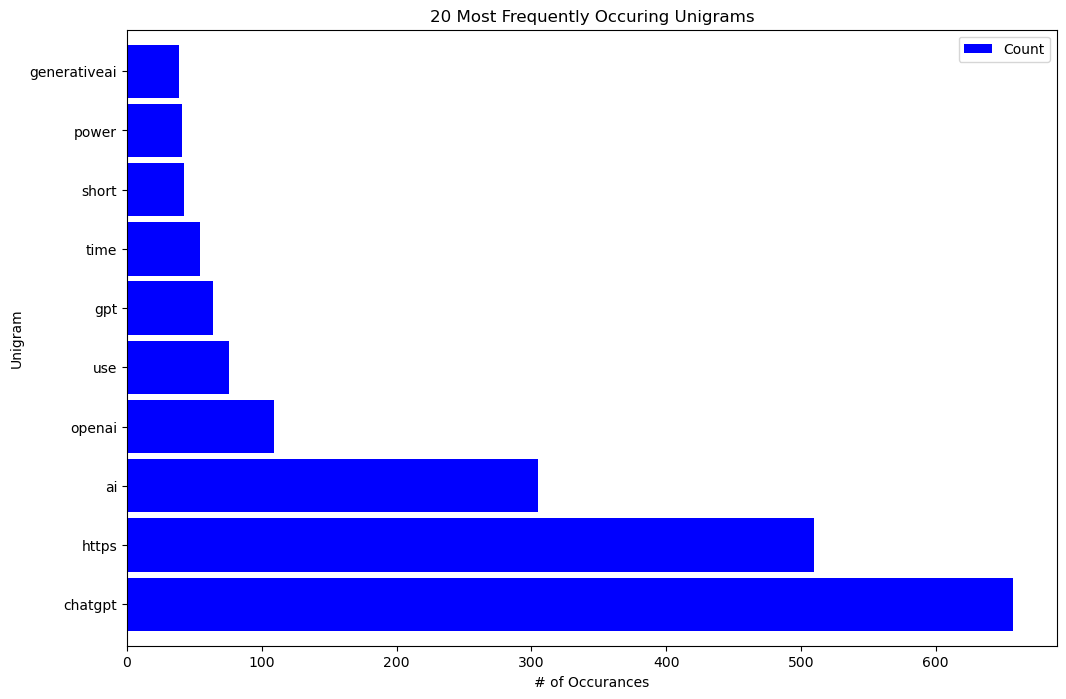

In [326]:
import pandas as pd

df = pd.DataFrame(topunigrams, columns=['Unigram', 'Count'])
df.plot.barh(x='Unigram', y='Count', color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Unigrams')
plt.ylabel('Unigram')
plt.xlabel('# of Occurances')

In [327]:
topbigrams = get_top_ngrams(bigrams)

Text(0.5, 0, '# of Occurances')

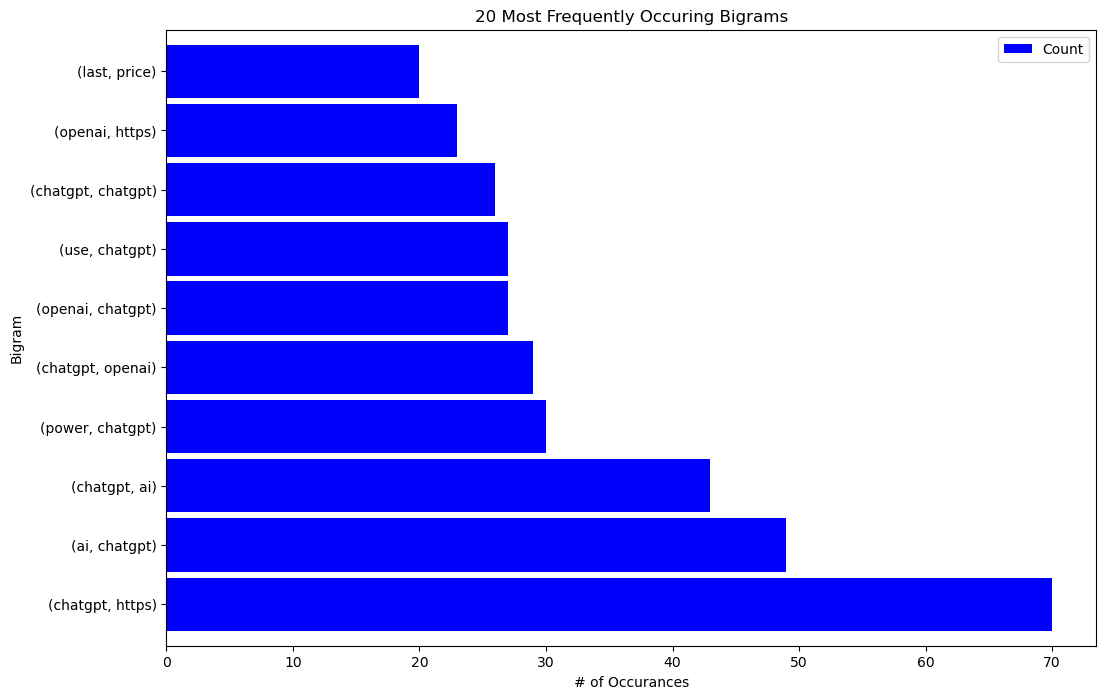

In [328]:
df = pd.DataFrame(topbigrams, columns=['Bigram', 'Count'])
df.plot.barh(x='Bigram', y='Count', color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

In [329]:
toptrigrams = get_top_ngrams(trigrams)

Text(0.5, 0, '# of Occurances')

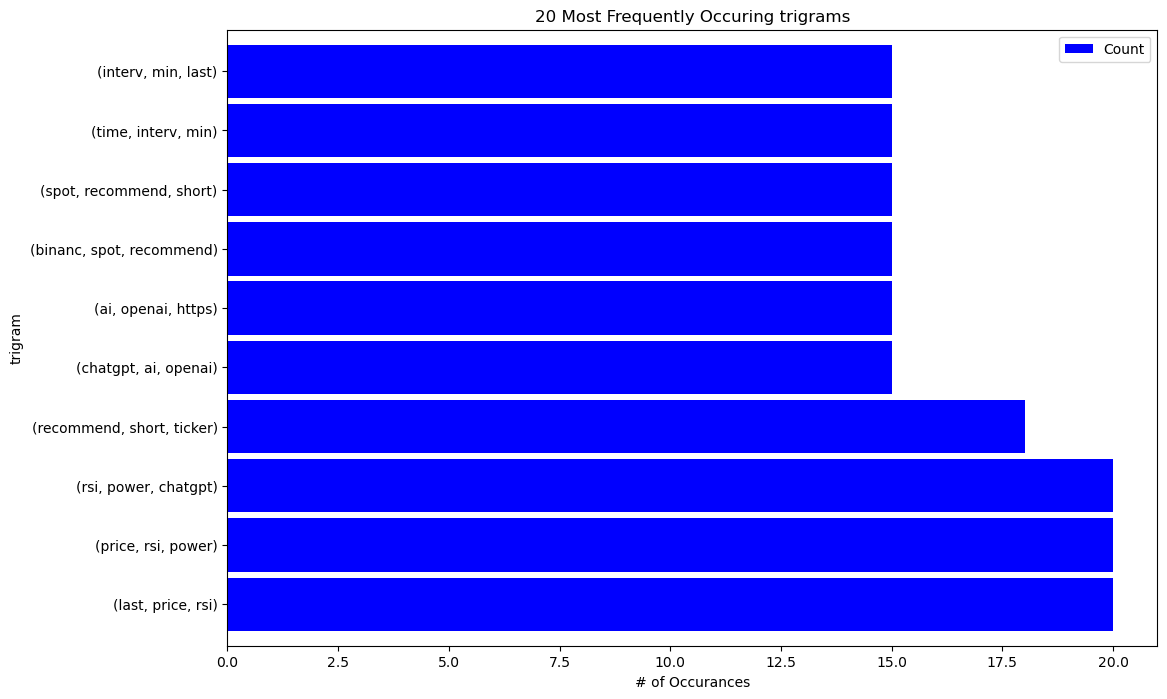

In [330]:
df = pd.DataFrame(toptrigrams, columns=['trigram', 'Count'])
df.plot.barh(x='trigram', y='Count', color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring trigrams')
plt.ylabel('trigram')
plt.xlabel('# of Occurances')